# Understanding Interannual variabilities EL-NINO, IOD etc

In [3]:
%load_ext ferretmagic

The ferretmagic extension is already loaded. To reload it, use:
  %reload_ext ferretmagic


## EL-NINO  & LA-NINA

 El Niño and La Niña are the warm and cool phases of a recurring climate pattern across the tropical Pacific—the El Niño-Southern Oscillation, or “ENSO” for short. The pattern shifts back and forth irregularly every two to seven years, and each phase triggers predictable disruptions of temperature, precipitation. These changes disrupt the large-scale air movements in the tropics, triggering a cascade of global side effects.

<img src="Images/ENSO_sst_satellite.jpeg" width="400" height="400"> 

<img src="Images/ENSO_sche_SST.png" width="500" height="500"> 

* Schematic : https://www.climate.gov/enso


## Sea level associated with ENSO

<video controls src="Images/ELNINO_SSH_aviso.mp4" />

### Literature : Han et al., 2017 
 ![aviso sea level](Images/ELNINO_sealevel.png)

In [2]:
%%ferret
use/ORDER=XYT Data/AVISO_monthly_2x2deg_Indo_Pacifi_1993_2019.nc
use Data/AVISO_trend_monthly.nc
use Data/Index/SOI_ELNINO.nc
use Data/Index/DMI_IOD.nc
use Data/TG/Kanton_d013.nc
use Data/TG/Padang_d107.nc
use Data/TG/Gan_d109.nc
let Sla_detrend  = SLA[d=1] - ssh[d=2]

## EL-NINO SOI Index
The Southern Oscillation Index (SOI) is a standardized index based on the observed sea level pressure differences between Tahiti and Darwin, Australia.
Downloded from 
https://www.ncdc.noaa.gov/teleconnections/enso/indicators/soi/


In [4]:
%%ferret
use/ORDER=XYT Data/AVISO_monthly_2x2deg_Indo_Pacifi_1993_2019.nc
use Data/AVISO_trend_monthly.nc
use Data/Index/SOI_ELNINO.nc
use Data/Index/DMI_IOD.nc
use Data/TG/Kanton_d013.nc
use Data/TG/Padang_d107.nc
use Data/TG/Gan_d109.nc
let Sla_detrend  = SLA[d=1] - ssh[d=2]

           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset
           *** NOTE: Dataset has FeatureType attribute: Timeseries
           *** NOTE: But is not initialized as a DSG File: Row Size variable w/ sample_dimension attribute not found.
           *** NOTE: Initializing the file as a non-DSG dataset


! Enter_GO bar_chart3 poly/line/thick=0.2/nolabel/fill/ove/key/lev=(-inf)(-3,3,0.5)(inf) soi[d=3] soi[d=3]
! Exit_GO


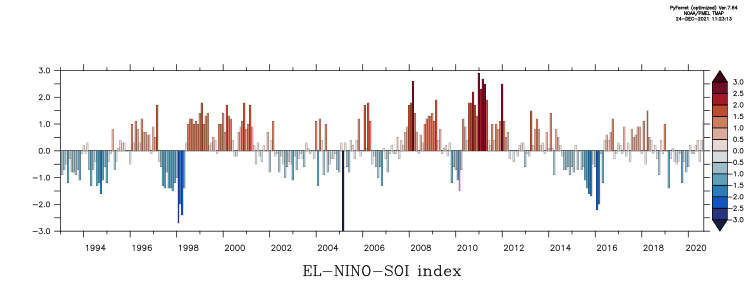

In [5]:
%%ferret
set win/asp=.4

palette cmocean_balance
set region/t=01-jan-1993:30-dec-2020

pl/vlimit=-3:3/title="EL-NINO-SOI index" soi[d=3]*0
go bar_chart3 poly/line/thick=0.2/nolabel/fill/ove/key/lev=(-inf)(-3,3,0.5)(inf) soi[d=3] soi[d=3]

## Sea level variability during an elnino

! Enter_GO land 7
! Exit_GO


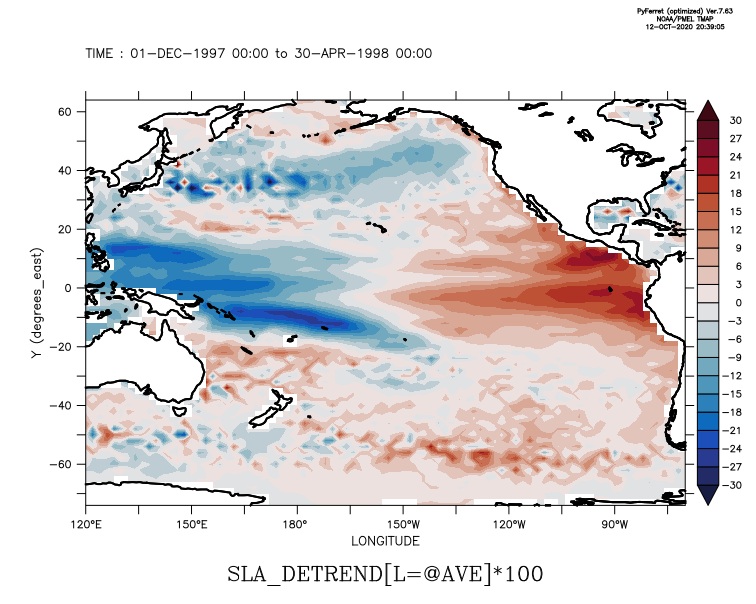

In [47]:
%%ferret
set win/asp=.8
set region/x=120:290/y=-75:70
fill/t=01-Dec-1997:30-Apr-1998/lev=(-inf)(-30,30,3)(inf) sla_detrend[l=@ave]*100
    go land 7

## Sea level variability during a La-nina

! Enter_GO land 7
! Exit_GO


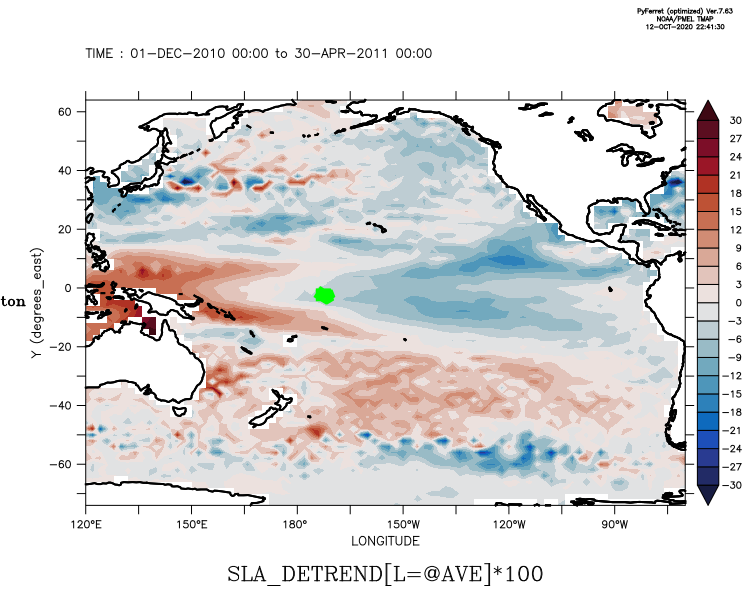

In [51]:
%%ferret
set win/asp=.8
set region/x=120:290/y=-75:70
fill/t=01-Dec-2010:30-Apr-2011/lev=(-inf)(-30,30,3)(inf) sla_detrend[l=@ave]*100
    plot/vs/over/nolab/thick=13/sym=88/color=green  lon[d=5],lat[d=5]
label `lon[d=6]-5`,`lat[d=6]-5`,0,0,0.13 @TRKanton
    go land 7

## Can we observe this in TG - Kanton located in the Pacific Ocean


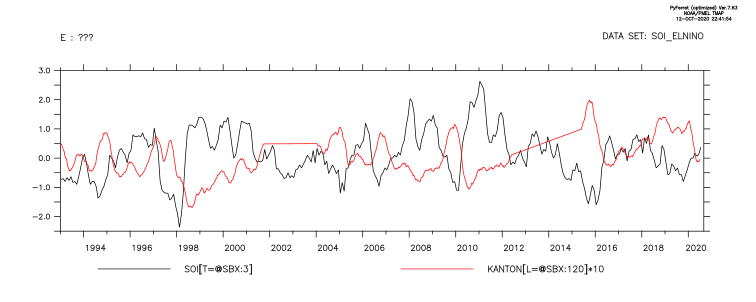

In [52]:
%%ferret
set win/asp=.4
let kanton = (sea_level[d=5,l=@fln:3]-sea_level[d=5,l=@ave])/1000
pl soi[d=3,l=@sbx:3],kanton[l=@sbx:120]*10

## Correlation between ENSO Index vs sea level

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


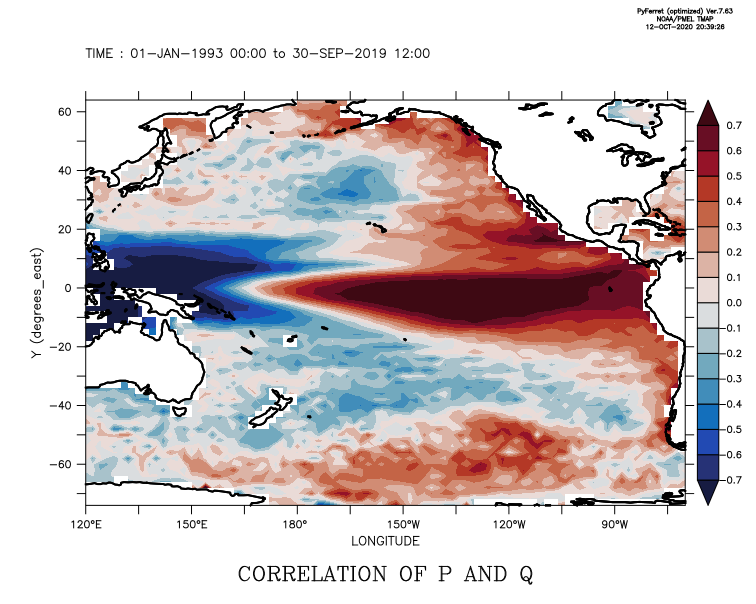

In [49]:
%%ferret
let p  = soi[gt=sla[d=1],l=@sbx:5,d=3]*-1 ; let q = sla_detrend[l=@sbx:5] ; go variance ;     
set win/asp=.8
set region/x=120:290/y=-75:70
fill/lev=(-inf)(-0.7,0.7,0.1)(inf) correl ; go land 7

## Regression between ENSO Index vs sea level

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


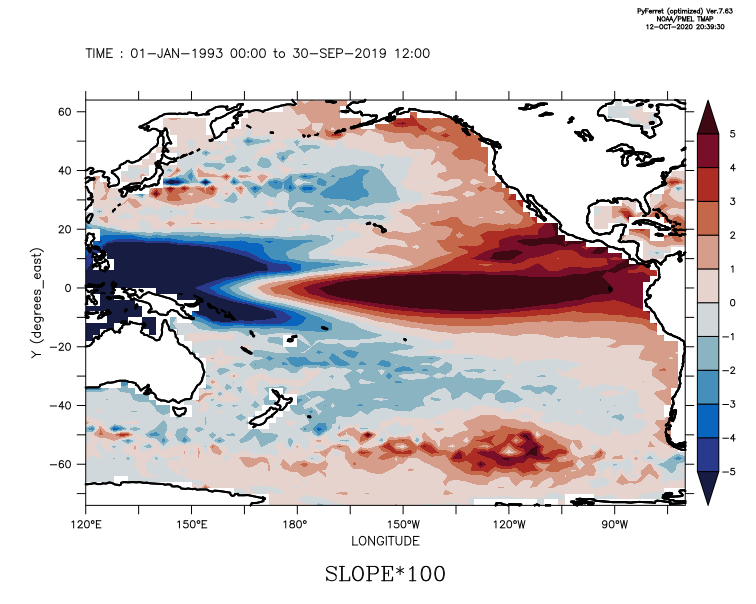

In [50]:
%%ferret
let p  = soi[gt=sla[d=1],l=@sbx:5,d=3]*-1 ; let q = sla_detrend[l=@sbx:5] ; go regresst ; 
set win/asp=.8
set region/x=120:290/y=-75:70
fill/lev=(-inf)(-5,5,1)(inf) slope*100 ; go land 7

## Indian Ocean Dipole (IOD)

The Indian Ocean Dipole (IOD) is defined by the difference in sea surface temperature between two areas (or poles, hence a dipole) – a western pole in the Arabian Sea (western Indian Ocean) and an eastern pole in the eastern Indian Ocean south of Indonesia. Events usually start around May or June, peak between August and October and then rapidly decay when the monsoon arrives in the southern hemisphere around the end of spring. The IOD affects the climate of Australia and other countries that surround the Indian Ocean Basin, and is a significant contributor to rainfall variability in this region. 


* Positive event:

<img src="Images/iod-positive.png" width="600" height="600"> 

warmer sea surface temperatures in the western Indian Ocean relative to the east
easterly wind anomalies across the Indian Ocean and less cloudiness to Australia's northwest
less rainfall over southern Australia and the Top End.


* Negative event:

<img src="Images/iod-negative.png" width="600" height="600"> 

cooler sea surface temperatures in the western Indian Ocean relative to the east
winds become more westerly, bringing increased cloudiness to Australia's northwest
more rainfall in the Top End and southern Australia.

<img src="Images/IndianOceanDipole-positive.png" width="600" height="600"> 


### DMI - IOD index
Indian Ocean Dipole mode Index (DMI). The DMI is defined as the difference between the SST anomalies (ºC) of Western (10ºS-10ºN & 50ºE-70ºE) and Eastern (10ºS-0ºN & 90ºE-110ºE) Equatorial Indian Ocean regions (WEST-EAST).

### Literature : Han et al., 2017 

<img src="Images/IOD_sealevel.png" width="700" height="700"> 
 
### Plot

! Enter_GO bar_chart3 poly/line/thick=0.2/nolabel/fill/ove/key/lev=(-inf)(-1.5,1.5,0.3)(inf) dmi[d=4] dmi[d=4]
! Exit_GO


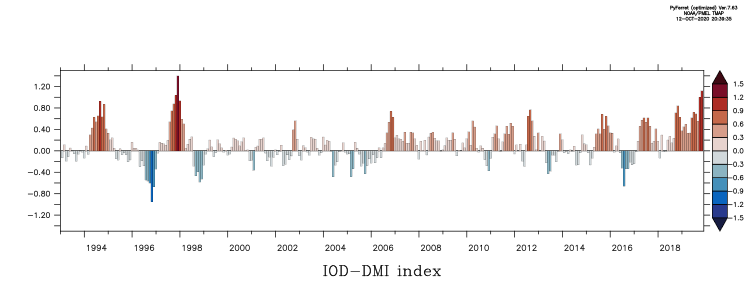

In [51]:
%%ferret
set win/asp=.4

palette cmocean_balance
set region/t=01-jan-1993:30-dec-2020

pl/vlimit=-1.5:1.5/title="IOD-DMI index" dmi[d=4]*0
go bar_chart3 poly/line/thick=0.2/nolabel/fill/ove/key/lev=(-inf)(-1.5,1.5,0.3)(inf) dmi[d=4] dmi[d=4]

## Sea level variability during a positive phase of DMI-index

! Enter_GO land 7
! Exit_GO


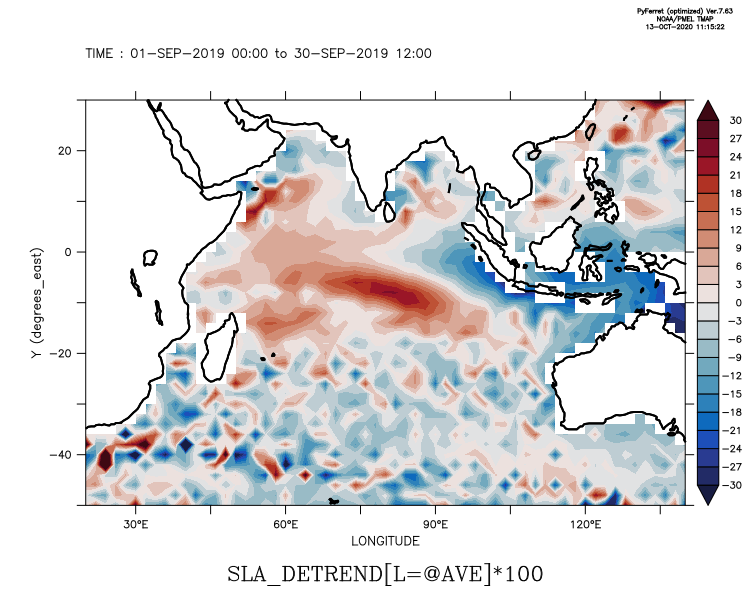

In [8]:
%%ferret
set win/asp=.8
set region/x=20:140/y=-50:30
fill/lev=(-inf)(-30,30,3)(inf)/t=01-sep-2019:30-dec-2019 sla_detrend[l=@ave]*100 ; go land 7

## Sea level variability during a negative phase of DMI-index

! Enter_GO land 7
! Exit_GO


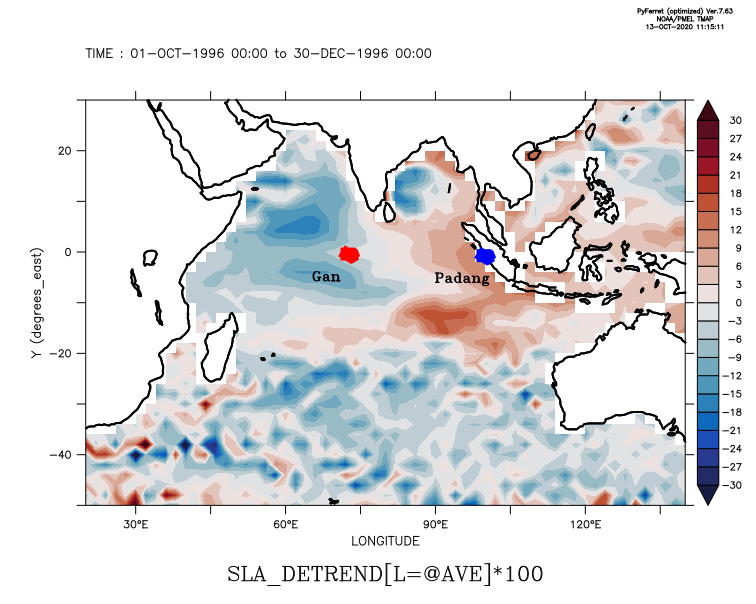

In [6]:
%%ferret
set win/asp=.8
set region/x=20:140/y=-50:30
fill/t=01-Oct-1996:30-dec-1996/lev=(-inf)(-30,30,3)(inf) sla_detrend[l=@ave]*100 ; go land 7
plot/vs/over/nolab/thick=13/sym=88/color=blue  lon[d=6],lat[d=6]
plot/vs/over/nolab/thick=13/sym=88/color=red  lon[d=7],lat[d=7]
label `lon[d=6]-5`,`lat[d=6]-5`,0,0,0.13 @TRPadang
label `lon[d=7]-5`,`lat[d=7]-5`,0,0,0.13 @TRGan

## Can we observe this variability in TG - Padang or Gan 


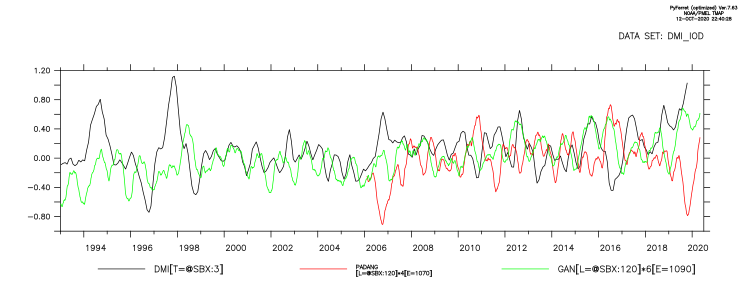

In [50]:
%%ferret
set win/asp=.4
let Padang = (sea_level[d=6,l=@fln:3]-sea_level[d=6,l=@ave])/1000
let Gan    = (sea_level[d=7,l=@fln:3]-sea_level[d=7,l=@ave])/1000
pl dmi[d=4,l=@sbx:3],Padang[l=@sbx:120]*4,Gan[l=@sbx:120]*6

## Correlation between DMI-Index vs sea level

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


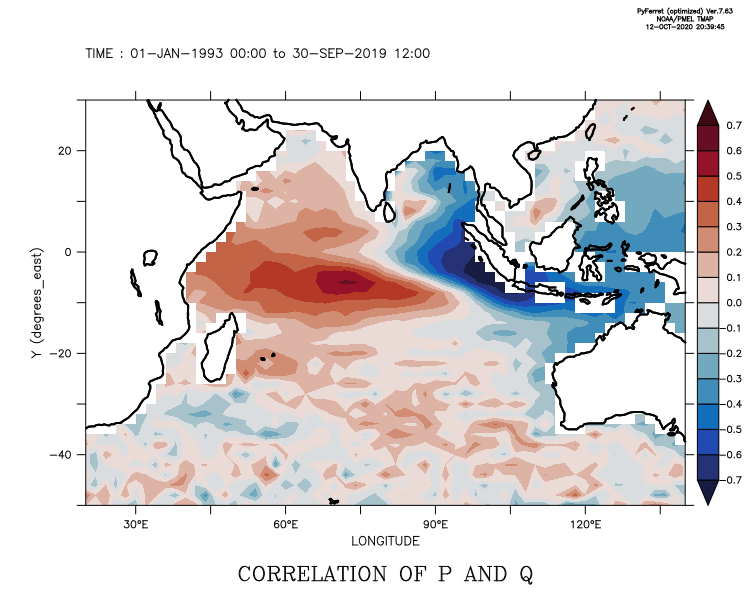

In [54]:
%%ferret
set win/asp=.8
set region/x=20:140/y=-50:30
let p  = dmi[gt=sla[d=1],l=@sbx:5,d=4] ; let q = sla_detrend[l=@sbx:5] ; go variance ;

fill/lev=(-inf)(-0.7,0.7,0.1)(inf) correl ; go land 7

## Regression between DMI-Index vs sea level

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


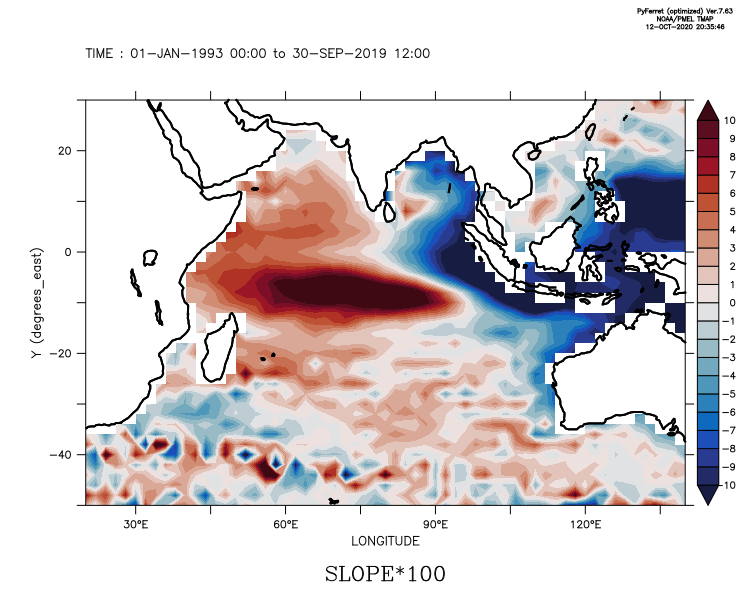

In [37]:
%%ferret
set win/asp=.8
set region/x=20:140/y=-50:30
let p  = dmi[gt=sla[d=1],l=@sbx:5,d=4] ; let q = sla_detrend[l=@sbx:5] ; go regresst ; 

fill/lev=(-inf)(-10,10,1)(inf) slope*100 ; go land 7

## Southern Annular Mode (SAM)

The Southern Annular Mode, or SAM, is a climate driver that can influence rainfall and temperature in Australia. The SAM refers to the (non-seasonal) north-south movement of the strong westerly winds that blow almost continuously in the mid- to high-latitudes of the southern hemisphere as an annulus around Antarctica. This belt of westerly winds is also associated with storms and cold fronts that move from west to east, bringing rainfall to southern Australia.

The SAM has three phases: neutral, positive and negative. Each positive or negative SAM event tends to last for around one to two weeks, though longer periods may also occur. The time frame between positive and negative events is quite random, but typically in the range of a week to a few months. During summer a positive SAM can result in increased rainfall in SE Australia while during winter a positive SAM will see lower rainfall in Southern Australia and a negative SAM will allow more cold fronts to impact southern and SW Australia. In recent months SAM has moved from negative to neutral.


<img src="Images/sam-summer-positive.png" width="600" height="600"> 

<img src="Images/sam-summer-negative.png" width="600" height="600"> 

### References 
* W. Han, G. A. Meehl, D. Stammer, A. Hu, B. Hamlington, J. Kenigson, H. Palanisamy, P. Thompson, Spatial Patterns of Sea Level Variability Associated with Natural Internal Climate Modes. Surv. Geophys. 38, 217–250 (2017).